# Section One - Paper Review
###### Yiwen Chen

## Paper Title:  Let's build Bridges, not Walls: SPARQL Querying of TinkerPop Graph Databases with Sparql-Gremlin 
Link:  *(https://ieeexplore-ieee-org.eres.library.manoa.hawaii.edu/stamp/stamp.jsp?tp=&arnumber=9031506)*

#### 2020 IEEE 14th International Conference on Semantic Computing  on 12 March 2020
Harsh Thakkar - OSTHUS GmbH, Germany
Renzo Angles - OSTHUS GmbH, Germany
Marko Rodriguez and Stephen Mallette - Apache TinkerPop, USA
Jens Lehmann - University of Bonn, Germany

## Brief Summary
The tool "SPARQL-gremlin" is created to translate SPARQL queries to Gremlin pattern matching traversals. The SPARQL-gremlin allows users to run queries expressed in the W3C SPARQL query language over various graph data management systems (OLTP and OLAP). As of the time of the paper, SPARQL-gremlin is only a plugin of the apache ThinkerPop graph computing framework.

## What was the Problem?
**Main Problem: SPARQL and Gremlin lack interoperability**
- Knowledge graphs have become increasingly popular
- Property Graphs (PG) vs. W3C Resource Description Framework (RDF)
- RDF is suited for distributed
data integration with built-in worldwide unique identifiers
and vocabularies
- PGs, on the other hand, support horizontally
scalable storage and querying, and are widely used for modern
data analytics applications.
- Standard query language for RDF databases is SPARQL, whereas PG databases are Gremlin traversal language

## What is the Solution
**Solution: Creating a that allows the execution of SPARQL queries over graph databases by translating them to Gremlin traversals (SPARQL-gremlin)**

## Motivation & Goal 
**Motivation: It will help users create knowledge graphs easier, and it is one of the first formally published works that address the query interoperability issue between SPARQL and PG query language**


**Goal: present a novel method to execute SPARQL queries
over Property graph databases by translating them to
Gremlin pattern matching traversals.**

## Methodology
- RDF and SPARQL vs. Property Graphs and Gremlin
- An RDF graph is a set of RDF triples (s, p, o) where s is called the subject, p is the predicate, and o is the object.
- A Property Graph is a directed, labeled multigraph whose main characteristic is that nodes and edges can contain a set of key-value pairs.

### Overview: compare different -> implement tranformation -> test/experiment -> disscussion on result

#### Compare Different
The graph below shows an example of the RDF graph (top) and PG (bottom) describing information about people and software.

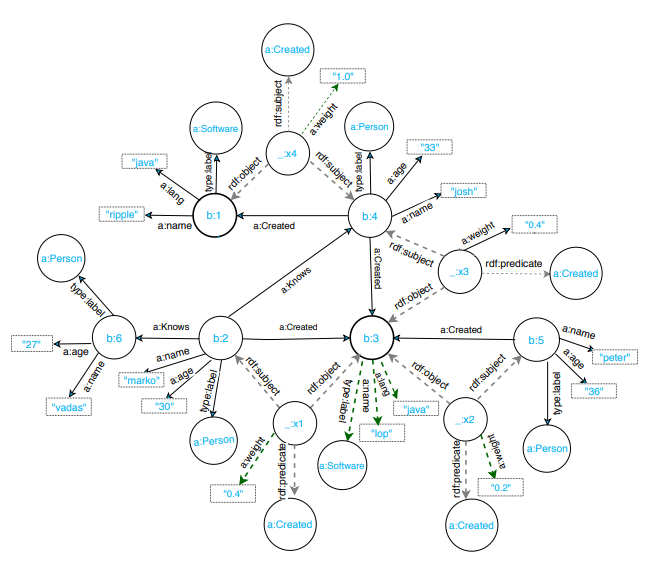
<center>Example of RDF graph describing information about people and software

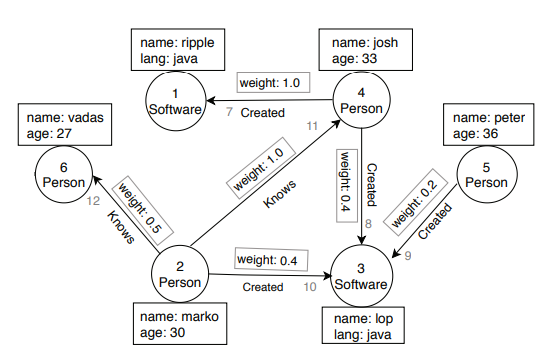
<center>Example of Property graph

##### Example of SPARQL
```SPARQL
SELECT ?age WHERE{
    ?person v:label "person"
    ?person e:created?project.
    ?person v:age?age.
    FILTER(?age<30)}
```
##### Example of Gremlin
```Gremlin
g.V().match(
    as('person').hasLabel('person'),
    as('person').out('created').as('project'),
    as('person').values('age').as('age').where('age',it(30)))
```
Figuare below show how the transformation look like
![transformation.png](attachment:transformation.png)

### Implementation
##### Encoding SPARQL Prefixes -> Query Translation Pipeline (QTP)


Figuare below show the general sparql-gremlin tool query tranlation pipeline

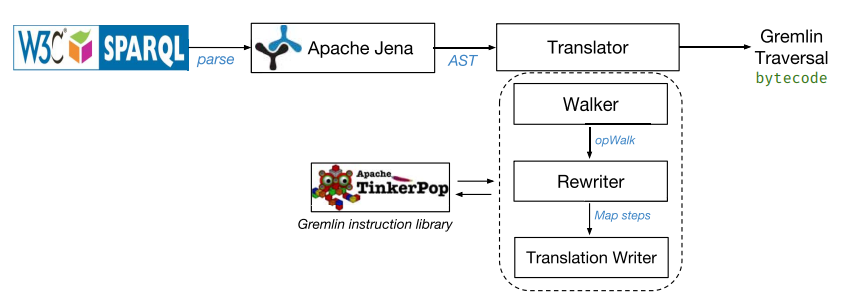

general break down of the QTP process
- Parsed input SPARQL query using Jena SPARQL
- opWalker map each pattern of SPARQL query to rewrite in Gremilin
- Translation Writer modeule will generate a final conjunctive traversal
- Generate Gremlin Bytecode for TinkerPop use


### Testing
##### Running an Experimental Evaluation to see if SPARQL - gremlin is running properly by answering the following questions

**Q1) Query preservation:** Do the SPARQL-gremlin generated Gremlin traversals return the same results as their
SPARQL counterparts? i.e., is the proposed approach
preserving the meaning of the input queries?

**Q2) Performance analysis:** What observations and insights
can we obtain upon executing the SPARQL queries and
their Gremlin counterparts over three top-of-the-line RDF
and Graph databases, respectively?

##### General Setup

**Datasets:** Northwindd dataset and Berlin SPARQL benchmark dataset

**Queries:** 30 SPARQL queries per dataset

<center>table below show the query feature use. </center>

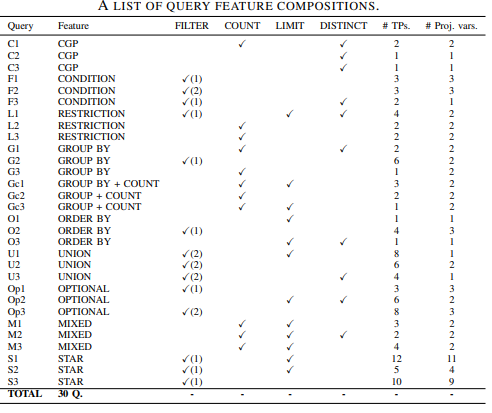
    
Machine Spec: 

- CPU: Intel Xeon CPU E5-2660 v3 (2.60GHz)
- RAM: 128 GB DDR3
- HDD: 512 GB SSD
- OS: Linux 4.2-genertic

### Result

- Result show SPARQL queries and Gremlin traversals were equal.
<center> Show below the chart showing the result of both SPARQL and Gremlin </center>

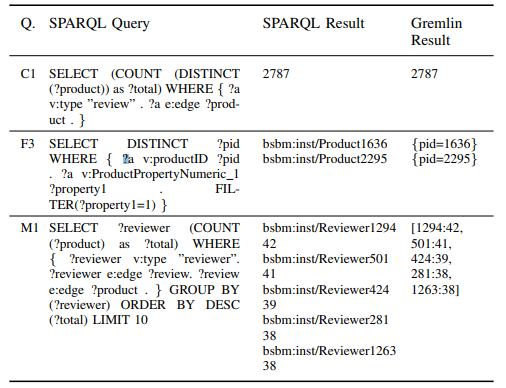



## Limitations

- SPARQL queries that Apache Jena cannot parse cannot be translated.
- SPARQL queries with regular expressions are currently not supported. This will be resolved in TinkerPop4, providing native support for regex in Gremlin traversals.
- Only available as a plug-in on TinkPop

## Main Take Away

#### General Impact
- It enables the users familiar with W3C SPARQL to query a variety of TinkerPop-enabled graph databases
- It facilitates efforts for bridging the data and query interoperability gap between the Semantic Web and Graph database communities

#### Comunity Impact
- Gaining attention and adoption by both the academic and industry communities
- Being used by another research group like IBM


***The SPARQL-Gremlin is a plugin of the Apache TinkerPop framework, which allows executing SPARQL queries over property graphs using
Gremlin pattern matching traversals***

## Reference & Resources
- Paper Link : *https://ieeexplore-ieee-org.eres.library.manoa.hawaii.edu/stamp/stamp.jsp?tp=&arnumber=9031506*
- Experiment Github: *https://github.com/harsh9t/Gremlinator-Experiments*
- TinkerPop Doc: *https://tinkerpop.apache.org/*

# Section Two - Tutorial on using sparql-gremlin

#### Application and Tools used in the Tutorial
- Gephi Version 0.9.7 for see visulation of the graph *https://gephi.org/users/download/*
    - Gephi graph streaming plug in
- Apache TinkerPop verison 3.5.4 (the sparql-greml plug in is in here) *https://www.apache.org/dyn/closer.lua/tinkerpop/3.5.4/apache-tinkerpop-gremlin-console-3.5.4-bin.zip*
- Java *https://www.java.com/download/ie_manual.jsp*
- Docker (Optional) *https://docs.docker.com/get-docker/*

### Getting Started with Apache TinkerPop (Windows)
Since SPARQL-gremlin is a plugin of Apache TinkerPop than we should start by setting up TinkPop.

Three ways to start the TinkerPop console
- Download the TinkerPop zip file from the offical site, unzip the file open the bin folder, and run gremlin.bat
- Open cmd and run ```docker pull tinkerpop/gremlin-console``` than  ```docker run -it tinkerpop/gremlin-console:3.6.1```
- Fork the current Repo onto the local device and run gremlin.bat in \apache-tinkerpop-gremlin-console-3.5.4\bin

If everything goes well, you should have something like this.
```
         \,,,/
         (o o)
-----oOOo-(3)-oOOo-----
plugin activated: tinkerpop.server
plugin activated: tinkerpop.gephi
plugin activated: tinkerpop.utilities
plugin activated: tinkerpop.tinkergraph
gremlin>
```
Next lets work with the default graph Modern that TinkerPop provide (which is located in \apache-tinkerpop-gremlin-console-3.5.4\data if not docker) 

***Let run the following script***
``` 
// Create an instance of the "Modern" toy graph
graph = TinkerFactory.createModern()

// Create the traversal source
g = graph.traversal()

// Get all vertices
g.V()

// Get the vertex with the ID "1"
g.V(1)
```
***You result something like this after ***
```

         \,,,/
         (o o)
-----oOOo-(3)-oOOo-----
plugin activated: tinkerpop.server
plugin activated: tinkerpop.gephi
plugin activated: tinkerpop.utilities
plugin activated: tinkerpop.tinkergraph
gremlin> graph = TinkerFactory.createModern()
==>tinkergraph[vertices:6 edges:6]
gremlin> g = graph.traversal()
==>graphtraversalsource[tinkergraph[vertices:6 edges:6], standard]
gremlin> g.V()
==>v[1]
==>v[2]
==>v[3]
==>v[4]
==>v[5]
==>v[6]
gremlin> g.V(1)
==>v[1]
gremlin>
```
Feel free to play around with gremlin or import different data
docement can be found here *https://tinkerpop.apache.org/docs/current/reference/*

### Getting visualazation of graph using Gephi plugIn
Steps to set up Gephi for streaming
- First Open Gephi and download Graph Streaming from the tools bar
- Than create a new project
- On  the lower left side, click on streaming tab
- Expand Master -> right click on Master Sever and click Start
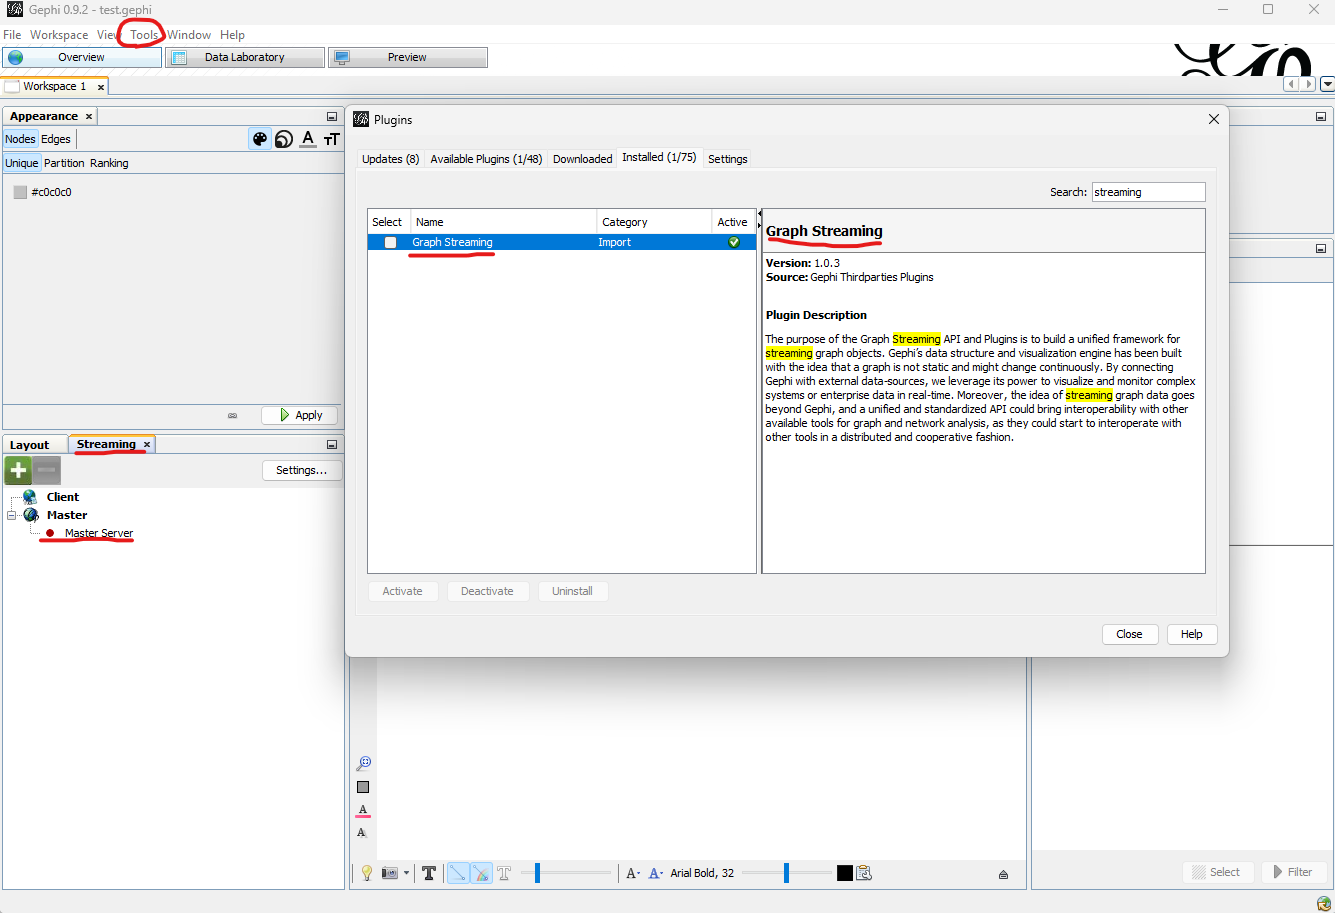

The defualt site where the streaming should be *http://localhost:8080/workspace1*

***Now back to the TinkerPop console and run the follow scripts***
```
//Link plugin
:plugin use tinkerpop.gephi

//connect to gephi streaming
:remote connect tinkerpop.gephi

//Sent graph
:> graph
```
***and should have result that look like this (remeber this is continue from last step where the graph already created)***
```
gremlin> :plugin use tinkerpop.gephi
==>tinkerpop.gephi activated
gremlin> :remote connect tinkerpop.gephi
==>Connection to Gephi - http://localhost:8080/workspace1 with stepDelay:1000, startRGBColor:[0.0, 1.0, 0.5], colorToFade:g, colorFadeRate:0.7, startSize:10.0,sizeDecrementRate:0.33
gremlin> :> graph
==>tinkergraph[vertices:6 edges:6]
==>false
gremlin>
```
***Gephi now should display something like this:***
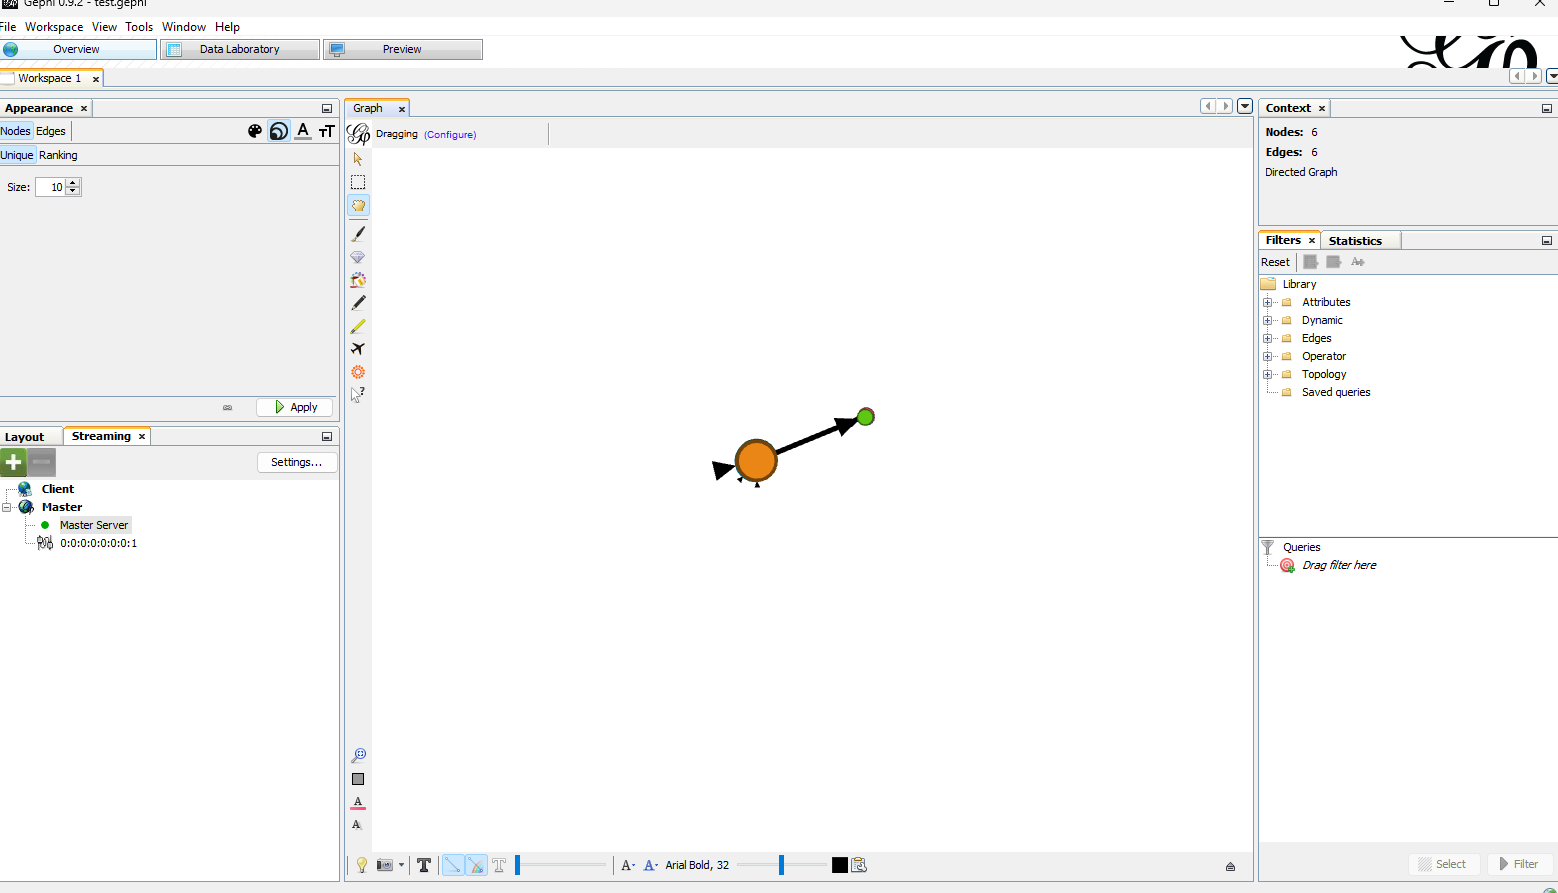

***Feel free to modefly the graph using gephi or gremlin to looking something like this:***

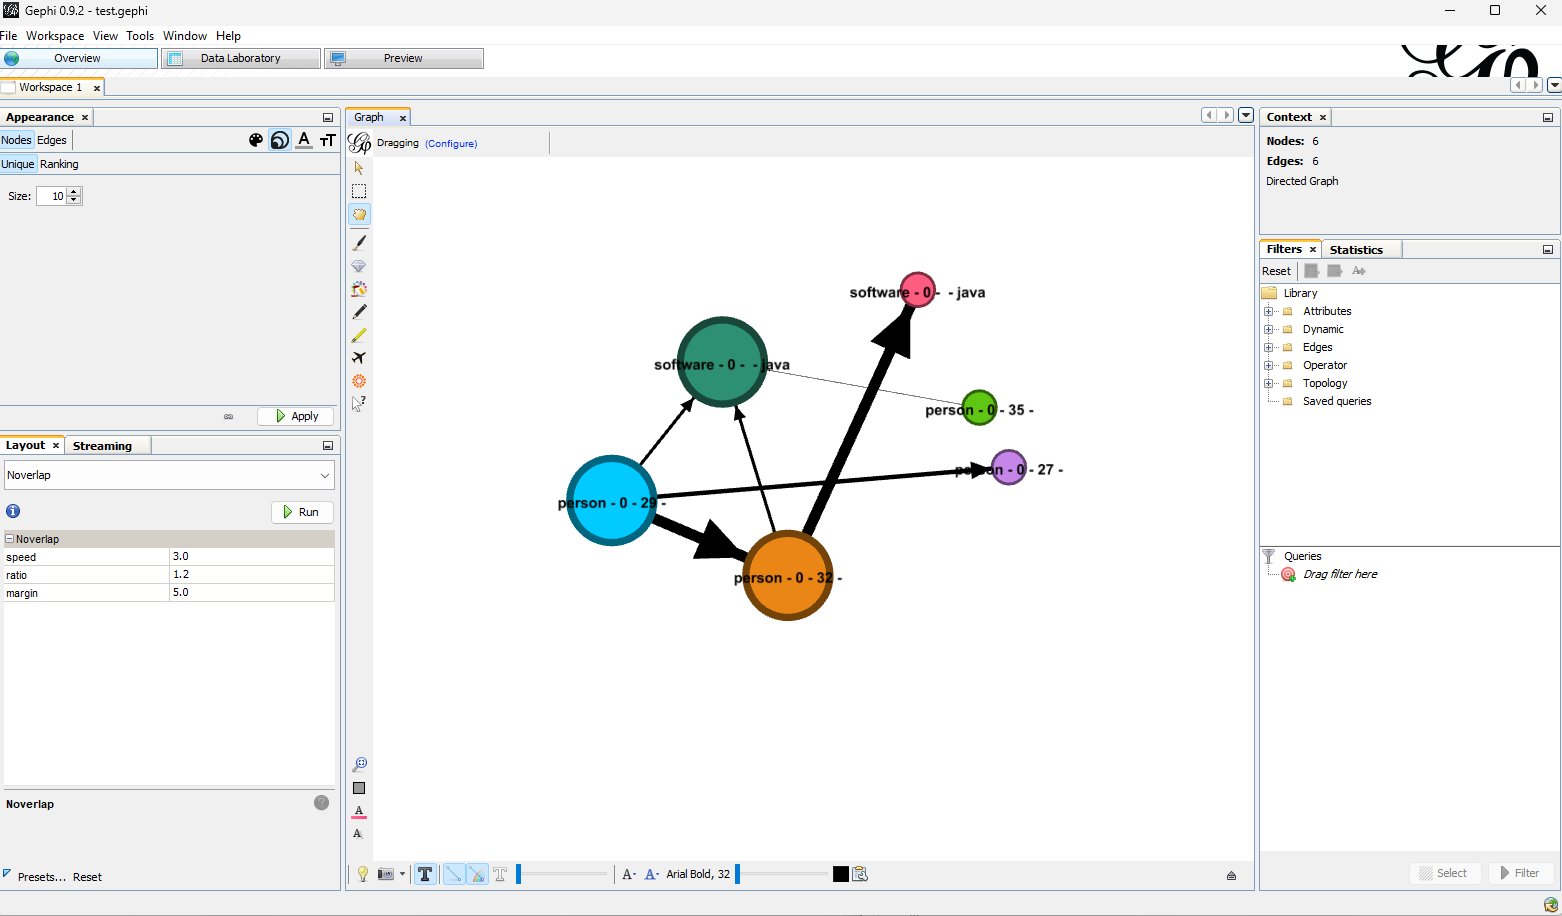

There many more plugin that work with TinkerPop to display graph like Hadoop plugin, suger plugin, spark plugin, ETC.
Basic anaylis of the graph are the arrow show connection (that person know each other) while the tickness of the edge/arrow show the how strong their connection is.

## Getting sparql-gremlin plugin and Running SPARQL
In this section, we going import the sparql-greml and writing sparql to display gremlin graph. 
To learn more about SPARQL use the following links
- Apache Jena *https://jena.apache.org/tutorials/sparql.html*
- W3C *https://www.w3.org/TR/sparql11-query/*
(sparql-gremmlin plugin mainly use APache Jena supported Sparql)

***Let install the plugin by running the following scripts:***
```
//install plugin
:install org.apache.tinkerpop sparql-gremlin 3.6.1

//link plugin
:plugin use tinkerpop.sparql
```
***Result should like something like this***
```
gremlin> :install org.apache.tinkerpop sparql-gremlin 3.6.1
==>Loaded: [org.apache.tinkerpop, sparql-gremlin, 3.6.1]
gremlin> :plugin use tinkerpop.sparql
==>tinkerpop.sparql activated
gremlin>
```

***Now let run some SPARQL by running the following scripts:***
```
//define g as traversalsource
g = traversal(SparqlTraversalSource).withEmbedded(graph)

//Runing SPARQL query to find the name and age with order from youngest to oldest
g.sparql("""SELECT ?name ?age WHERE { ?person v:name ?name . ?person v:age ?age } ORDER BY ASC(?age)""")
```

***Result should show this***
```
==>[name:vadas,age:27]
==>[name:marko,age:29]
==>[name:josh,age:32]
==>[name:peter,age:35]
```

Feel free to run more SPARQL query to play around. Look for more query example in the docement *https://tinkerpop.apache.org/docs/current/reference/#compilers*

***Here are some limitations with this plugin***
- SPARQL queries with variables in the predicate position are not currently covered
```
g.sparql("""SELECT * WHERE { ?x ?y ?z . }""")
```
- A SPARQL Union query with un-balanced patterns
```
g.sparql("""SELECT *
            WHERE {
                {?person e:created ?software .
                ?person v:name "josh" .}
                UNION
                {?software v:lang "java" .} }""")
```
- A non-Group key variable cannot be projected in a SPARQL query
```
g.sparql("""SELECT ?age
            WHERE {
                ?person v:label "person" .
                ?person v:age ?age .
                ?person v:name ?name .} GROUP BY (?age)""")
```

***More Limiation can be found on the https://tinkerpop.apache.org/docs/current/reference/#limitations page***

## Running Gremlin in Python
First ```pip install gremlinpython```

In [1]:
from gremlin_python.process.anonymous_traversal import traversal
from gremlin_python.driver.driver_remote_connection import DriverRemoteConnection
g = traversal().withRemote(DriverRemoteConnection('ws://localhost:8182/gremlin','g'))
g.V()

[['V'], ['values', '_ipython_canary_method_should_not_exist_'], ['values', '_ipython_canary_method_should_not_exist_']]

Too Learn more about the Running gremlin in python look the  https://tinkerpop.apache.org/docs/current/reference

## Summary of Tutorial
After this tutorial, you should be able to run and visual graph created in TinkerPop in Gephi. Furthermore, know how to run SPARQL query in TinkerPop. A SPARQL-gremlin plugin is an excellent tool for users that do not know about gremlin but are interested in creating Property Graphs with SPARQL query. I like the SPARQL query more since it is easier for me to learn.

#                        Thanks for Reading, Hope you learn something